In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier,StackingClassifier, RandomForestClassifier, AdaBoostClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.preprocessing import PolynomialFeatures


from sklearn.neighbors import KNeighborsClassifier 
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB



from sklearn.model_selection import train_test_split, cross_val_predict, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from imblearn.pipeline import make_pipeline

from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, ConfusionMatrixDisplay, confusion_matrix)


from warnings import filterwarnings
filterwarnings('ignore')

In [2]:
df = pd.read_csv('../data/clean_data.csv')

In [3]:
df.head()

,Unnamed: 0,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,0,67.0,0,1,228.69,36.6,1,1,0,1,0,1,0,0,1,1,0,0
1,1,61.0,0,0,202.21,28.1,1,0,0,1,0,0,1,0,0,0,1,0
2,2,80.0,0,1,105.92,32.5,1,1,0,1,0,1,0,0,0,0,1,0
3,3,49.0,0,0,171.23,34.4,1,0,0,1,0,1,0,0,1,0,0,1
4,4,79.0,1,0,174.12,24.0,1,0,0,1,0,0,1,0,0,0,1,0


In [4]:
# Dropping Unnamed column

df = df.drop('Unnamed: 0', axis = 1)

df.head()

,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,67.0,0,1,228.69,36.6,1,1,0,1,0,1,0,0,1,1,0,0
1,61.0,0,0,202.21,28.1,1,0,0,1,0,0,1,0,0,0,1,0
2,80.0,0,1,105.92,32.5,1,1,0,1,0,1,0,0,0,0,1,0
3,49.0,0,0,171.23,34.4,1,0,0,1,0,1,0,0,1,0,0,1
4,79.0,1,0,174.12,24.0,1,0,0,1,0,0,1,0,0,0,1,0


In [5]:
# Imablanced classes will be handles with SMOTE below after defining X and y.

In [6]:
df['stroke'].value_counts()

0    4861
1     249
Name: stroke, dtype: int64

In [7]:
df['stroke'].value_counts(normalize='True')

0    0.951272
1    0.048728
Name: stroke, dtype: float64

### Modeling

In [8]:
X= df.drop(columns = 'stroke') 
y= df['stroke']

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                    random_state=42,
                                                    stratify = y)

In [10]:
y_train.value_counts()

0    3645
1     187
Name: stroke, dtype: int64

In [11]:
y_test.value_counts()

0    1216
1      62
Name: stroke, dtype: int64

#### Naive Bayes

In [12]:
nb_pipe = make_pipeline(SMOTE(random_state=42), MultinomialNB())

nb_pipe_params = {
    'multinomialnb__alpha': [1, 1.5, 2]
}

nb_gs = GridSearchCV(nb_pipe, param_grid = nb_pipe_params, n_jobs=-1)

In [13]:
nb_gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                       ('multinomialnb', MultinomialNB())]),
             n_jobs=-1, param_grid={'multinomialnb__alpha': [1, 1.5, 2]})

In [14]:
nb_gs.score(X_train, y_train)

0.7056367432150313

In [15]:
nb_gs.score(X_test, y_test)

0.6971830985915493

In [16]:
nb_gs.best_params_

{'multinomialnb__alpha': 1}

#### kNN Classifer

In [17]:
knn_pipe = make_pipeline(SMOTE(random_state=42), StandardScaler(with_mean=False), KNeighborsClassifier())

knn_pipe_params = {
    'kneighborsclassifier__n_neighbors':[7,8,9]
}

knn_gs = GridSearchCV(knn_pipe, param_grid = knn_pipe_params, n_jobs=-1)

In [18]:
knn_gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                       ('standardscaler',
                                        StandardScaler(with_mean=False)),
                                       ('kneighborsclassifier',
                                        KNeighborsClassifier())]),
             n_jobs=-1,
             param_grid={'kneighborsclassifier__n_neighbors': [7, 8, 9]})

In [19]:
knn_gs.score(X_train, y_train)

0.8838726513569938

In [20]:
knn_gs.score(X_test, y_test)

0.8568075117370892

In [21]:
knn_gs.best_params_

{'kneighborsclassifier__n_neighbors': 8}

#### Random Forrest

In [22]:
rf_pipe = make_pipeline(SMOTE(random_state=42), RandomForestClassifier())


rf_pipe_params = {
    'randomforestclassifier__n_estimators': [5, 10, 20, 30],
    'randomforestclassifier__max_depth': [3, 4, 5, 6, 7],
    'randomforestclassifier__min_samples_leaf': [1],
    'randomforestclassifier__random_state': [42]
}

In [23]:
rf_gs = GridSearchCV(rf_pipe, param_grid = rf_pipe_params, n_jobs=-1)

In [24]:
rf_gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                       ('randomforestclassifier',
                                        RandomForestClassifier())]),
             n_jobs=-1,
             param_grid={'randomforestclassifier__max_depth': [3, 4, 5, 6, 7],
                         'randomforestclassifier__min_samples_leaf': [1],
                         'randomforestclassifier__n_estimators': [5, 10, 20,
                                                                  30],
                         'randomforestclassifier__random_state': [42]})

In [25]:
rf_gs.score(X_train, y_train)

0.8567327766179541

In [26]:
rf_gs.score(X_test, y_test)

0.8286384976525821

In [27]:
rf_gs.best_params_

{'randomforestclassifier__max_depth': 7,
 'randomforestclassifier__min_samples_leaf': 1,
 'randomforestclassifier__n_estimators': 20,
 'randomforestclassifier__random_state': 42}

#### Logistic Regression

In [28]:
lr_pipe = make_pipeline(SMOTE(random_state=42), StandardScaler(with_mean=False), LogisticRegression(penalty ='l2'))


lr_pipe_params = {
    'logisticregression__C':[.1, 1, 2, 3, 4],
}

lr_gs = GridSearchCV(lr_pipe, param_grid = lr_pipe_params, n_jobs=-1)

In [29]:
lr_gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                       ('standardscaler',
                                        StandardScaler(with_mean=False)),
                                       ('logisticregression',
                                        LogisticRegression())]),
             n_jobs=-1,
             param_grid={'logisticregression__C': [0.1, 1, 2, 3, 4]})

In [30]:
lr_gs.score(X_train, y_train)

0.8410751565762005

In [31]:
lr_gs.score(X_test, y_test)

0.8458528951486698

In [32]:
lr_gs.best_params_

{'logisticregression__C': 0.1}

#### ADA Boost

In [33]:
boost_pipe = make_pipeline(SMOTE(random_state=42), AdaBoostClassifier())

boost_pipe_params = {
    'adaboostclassifier__n_estimators': [140],
    'adaboostclassifier__base_estimator':[RandomForestClassifier(max_depth=7, min_samples_leaf=1, n_estimators=30)],

}

boost_gs = GridSearchCV(boost_pipe, param_grid = boost_pipe_params, n_jobs=-1)

In [34]:
boost_gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('smote', SMOTE(random_state=42)),
                                       ('adaboostclassifier',
                                        AdaBoostClassifier())]),
             n_jobs=-1,
             param_grid={'adaboostclassifier__base_estimator': [RandomForestClassifier(max_depth=7,
                                                                                       n_estimators=30)],
                         'adaboostclassifier__n_estimators': [140]})

In [35]:
boost_gs.score(X_train, y_train)

1.0

In [36]:
boost_gs.score(X_test, y_test)

0.9194053208137715

In [37]:
boost_gs.best_params_

{'adaboostclassifier__base_estimator': RandomForestClassifier(max_depth=7, n_estimators=30),
 'adaboostclassifier__n_estimators': 140}

#### Stacked

In [38]:
level1_estimators = [
    ('knn', knn_gs.best_estimator_),
    ('rf', rf_gs.best_estimator_),
    ('boost', boost_gs.best_estimator_)
]

stacked_model = StackingClassifier(estimators=level1_estimators,
                                 final_estimator = LogisticRegression())

In [39]:
stacked_model.fit(X_train, y_train)

StackingClassifier(estimators=[('knn',
                                Pipeline(steps=[('smote',
                                                 SMOTE(random_state=42)),
                                                ('standardscaler',
                                                 StandardScaler(with_mean=False)),
                                                ('kneighborsclassifier',
                                                 KNeighborsClassifier(n_neighbors=8))])),
                               ('rf',
                                Pipeline(steps=[('smote',
                                                 SMOTE(random_state=42)),
                                                ('randomforestclassifier',
                                                 RandomForestClassifier(max_depth=7,
                                                                        n_estimators=20,
                                                                        random_state=42))])),
                               ('boost',
                                Pipeline(steps=[('smote',
                                                 SMOTE(random_state=42)),
                                                ('adaboostclassifier',
                                                 AdaBoostClassifier(base_estimator=RandomForestClassifier(max_depth=7,
                                                                                                          n_estimators=30),
                                                                    n_estimators=140))]))],
                   final_estimator=LogisticRegression())

In [40]:
stacked_model.score(X_train, y_train)

0.9512004175365344

In [41]:
stacked_model.score(X_test, y_test)

0.9514866979655712

## Score Analysis

#### Naive Bayes 

In [72]:
preds1 = nb_gs.predict(X_test)

In [73]:
cm = confusion_matrix(y_test, preds1, labels= nb_gs.classes_)

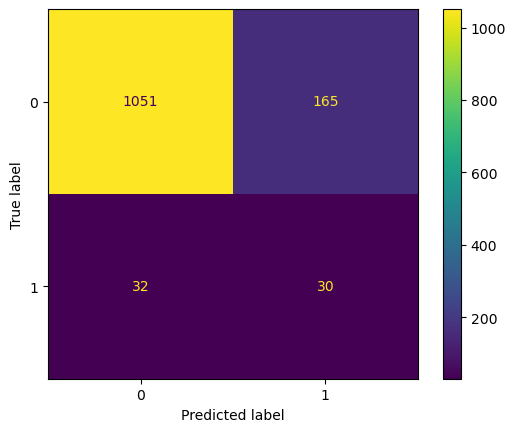

In [88]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                             display_labels=nb_gs.classes_,
                             );

disp.plot();



In [75]:
    acc = accuracy_score(y_test, preds1)
    recall = recall_score(y_test, preds1)
    prec = precision_score(y_test, preds1)
    f1 = f1_score(y_test, preds1)

    print(f'accuracy: {acc}')
    print(f'recall: {recall}')
    print(f'precision: {prec}')
    print(f'f1 score: {f1}')

accuracy: 0.6971830985915493
recall: 0.6129032258064516
precision: 0.09476309226932668
f1 score: 0.16414686825053995


#### KNN Neighbors

In [76]:
preds2 = knn_gs.predict(X_test)

In [77]:
cm = confusion_matrix(y_test, preds2, labels= knn_gs.classes_)

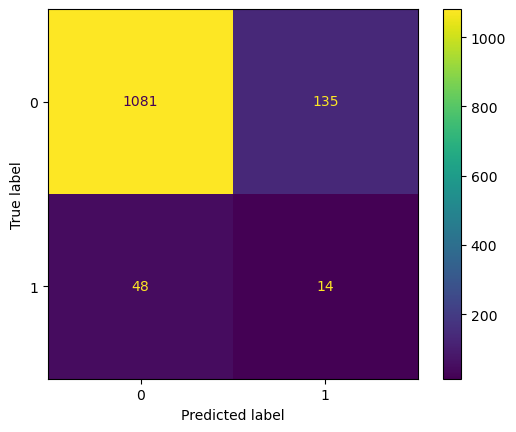

In [78]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                             display_labels=knn_gs.classes_,
                             );

disp.plot();

In [79]:
    acc = accuracy_score(y_test, preds2)
    recall = recall_score(y_test, preds2)
    prec = precision_score(y_test, preds2)
    f1 = f1_score(y_test, preds2)

    print(f'accuracy: {acc}')
    print(f'recall: {recall}')
    print(f'precision: {prec}')
    print(f'f1 score: {f1}')

accuracy: 0.8568075117370892
recall: 0.22580645161290322
precision: 0.09395973154362416
f1 score: 0.13270142180094788


#### Random Forrest

In [80]:
preds3 = rf_gs.predict(X_test)

In [81]:
cm = confusion_matrix(y_test, preds3, labels= rf_gs.classes_)

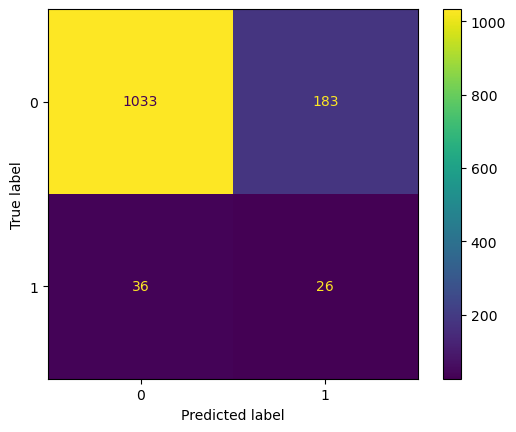

In [82]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                             display_labels=rf_gs.classes_,
                             );

disp.plot();

In [83]:
    acc = accuracy_score(y_test, preds3)
    recall = recall_score(y_test, preds3)
    prec = precision_score(y_test, preds3)
    f1 = f1_score(y_test, preds3)

    print(f'accuracy: {acc}')
    print(f'recall: {recall}')
    print(f'precision: {prec}')
    print(f'f1 score: {f1}')

accuracy: 0.8286384976525821
recall: 0.41935483870967744
precision: 0.12440191387559808
f1 score: 0.19188191881918817


#### Logistic Regression

In [84]:
preds4 = lr_gs.predict(X_test)

In [85]:
cm = confusion_matrix(y_test, preds4, labels= lr_gs.classes_)

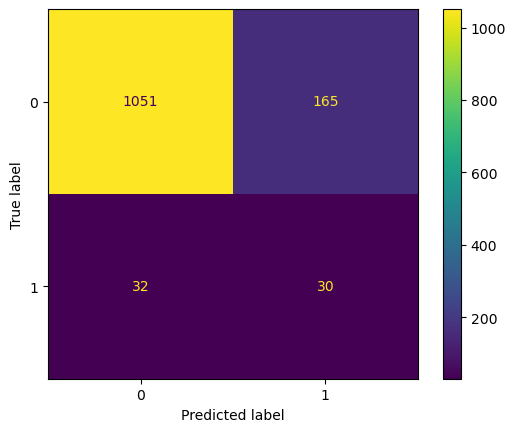

In [86]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                             display_labels=lr_gs.classes_,
                             );

disp.plot();

plt.savefig('../images/lr_cm.png')

In [87]:
    b_acc = accuracy_score(y_test, preds4)
    recall = recall_score(y_test, preds4)
    prec = precision_score(y_test, preds4)
    f1 = f1_score(y_test, preds4)

    print(f'accuracy: {b_acc}')
    print(f'recall: {recall}')
    print(f'precision: {prec}')
    print(f'f1 score: {f1}')

accuracy: 0.8458528951486698
recall: 0.4838709677419355
precision: 0.15384615384615385
f1 score: 0.23346303501945528


#### ADA Boost

In [61]:
preds5 = boost_gs.predict(X_test)

In [62]:
cm = confusion_matrix(y_test, preds5, labels= boost_gs.classes_)

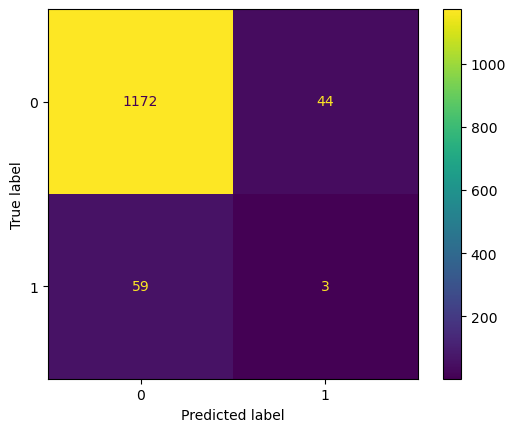

In [63]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                             display_labels=boost_gs.classes_,
                             );

disp.plot();

In [65]:
    acc = accuracy_score(y_test, preds5)
    recall = recall_score(y_test, preds5)
    prec = precision_score(y_test, preds5)
    f1 = f1_score(y_test, preds5)

    print(f'accuracy: {acc}')
    print(f'recall: {recall}')
    print(f'precision: {prec}')
    print(f'f1 score: {f1}')

accuracy: 0.9194053208137715
recall: 0.04838709677419355
precision: 0.06382978723404255
f1 score: 0.055045871559633024


#### Stacked

In [66]:
preds6 = stacked_model.predict(X_test)

In [67]:
cm = confusion_matrix(y_test, preds6, labels= stacked_model.classes_)

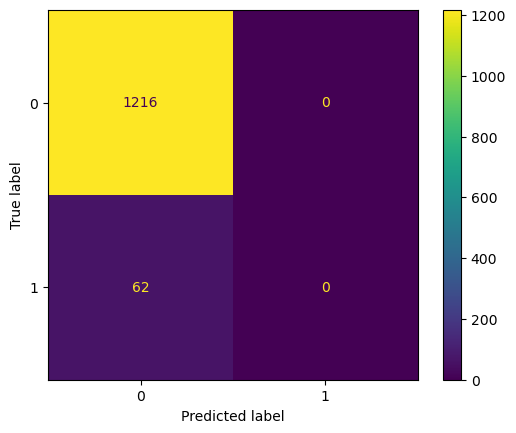

In [68]:
disp = ConfusionMatrixDisplay(confusion_matrix=cm, 
                             display_labels=stacked_model.classes_,
                             );

disp.plot();

In [69]:
    acc = accuracy_score(y_test, preds6)
    recall = recall_score(y_test, preds6)
    prec = precision_score(y_test, preds6)
    f1 = f1_score(y_test, preds6)

    print(f'accuracy: {acc}')
    print(f'recall: {recall}')
    print(f'precision: {prec}')
    print(f'f1 score: {f1}')

accuracy: 0.9514866979655712
recall: 0.0
precision: 0.0
f1 score: 0.0
